<a href="https://colab.research.google.com/github/dhananjay-dadhich/stock-market/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
training_data = pd.read_csv('/content/MSFT - MSFT.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [73]:
training_data = training_data.iloc[:, 2:3]

training_data.shape
training_data.head()

,High
0,0.101563
1,0.102431
2,0.103299
3,0.103299
4,0.100694


In [74]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [75]:
# Getting the inputs and outputs

x_train = training_data[0:8856]
y_train = training_data[1:8857]

print(x_train.shape)
print(y_train.shape)


(8856, 1)
(8856, 1)


In [76]:
# reshaping

x_train = np.reshape(x_train, (8856, 1, 1))

print(x_train.shape)

(8856, 1, 1)


In [77]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [78]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)


Epoch 1/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0357
Epoch 2/200
277/277 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 3/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 4/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 5/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 6/200
277/277 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 7/200
277/277 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 8/200
277/277 [==============================] - 0s 2ms/step - loss: 9.3465e-04
Epoch 9/200
277/277 [==============================] - 0s 1ms/step - loss: 2.5540e-04
Epoch 10/200
277/277 [==============================] - 0s 1ms/step - loss: 7.2571e-05
Epoch 11/200
277/277 [==============================] - 0s 2ms/step - loss: 3.8589e-05
Epoch 12/200
277/277 [==============================] - 0s 2ms/step - loss: 3.36

In [79]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('/content/DataFrame - DataFrame.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()


,Date
0,20210101
1,20210101
2,20210101
3,20210101
4,20210101


In [80]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (22805, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


In [81]:
predicted_stock_price

array([[507.4474],
       [507.4474],
       [507.4474],
       ...,
       [507.4474],
       [507.4474],
       [507.4474]], dtype=float32)

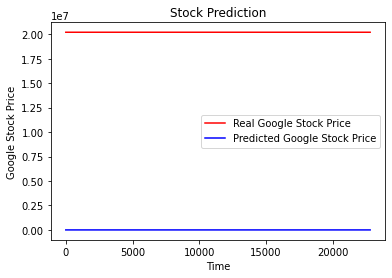

In [82]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [101]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('/content/MSFT - MSFT.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [102]:
training_data = training_data.iloc[:, 1:3]

training_data.shape
training_data.head()

,Open,High
0,0.088542,0.101563
1,0.097222,0.102431
2,0.100694,0.103299
3,0.102431,0.103299
4,0.099826,0.100694


In [103]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

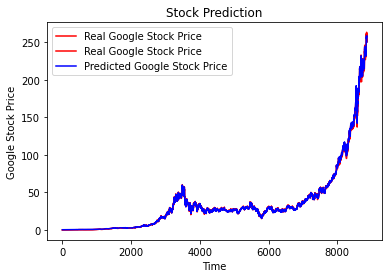

In [104]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()